In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [16]:
DATA_DIR = '../data/raw/2nd_test'

def load_single_file(filemane):
	"""
	Downloading a single file with vibration
	"""
	file_path = os.path.join(DATA_DIR, filemane)

	df = pd.read_csv(file_path, sep='\t', header=None)

	df.columns = ['Bearing_1', 'Bearing_2', 'Bearing_3', 'Bearing_4']

	return df


In [17]:
files = sorted(os.listdir(DATA_DIR))
print(f'Found {len(files)} of measurement files')

first_file = files[0]
df_healthy = load_single_file(first_file)

print(f"\n--- Analizying file: {first_file} ---")
print(f'Shape of the file(rows, columns): {df_healthy.shape}')
print('First 5 rows')
print(df_healthy.head())

Found 984 of measurement files

--- Analizying file: 2004.02.12.10.32.39 ---
Shape of the file(rows, columns): (20480, 4)
First 5 rows
   Bearing_1  Bearing_2  Bearing_3  Bearing_4
0     -0.049     -0.071     -0.132     -0.010
1     -0.042     -0.073     -0.007     -0.105
2      0.015      0.000      0.007      0.000
3     -0.051      0.020     -0.002      0.100
4     -0.107      0.010      0.127      0.054


In [23]:
fail_file = files[-5]
df_failure = load_single_file(fail_file)

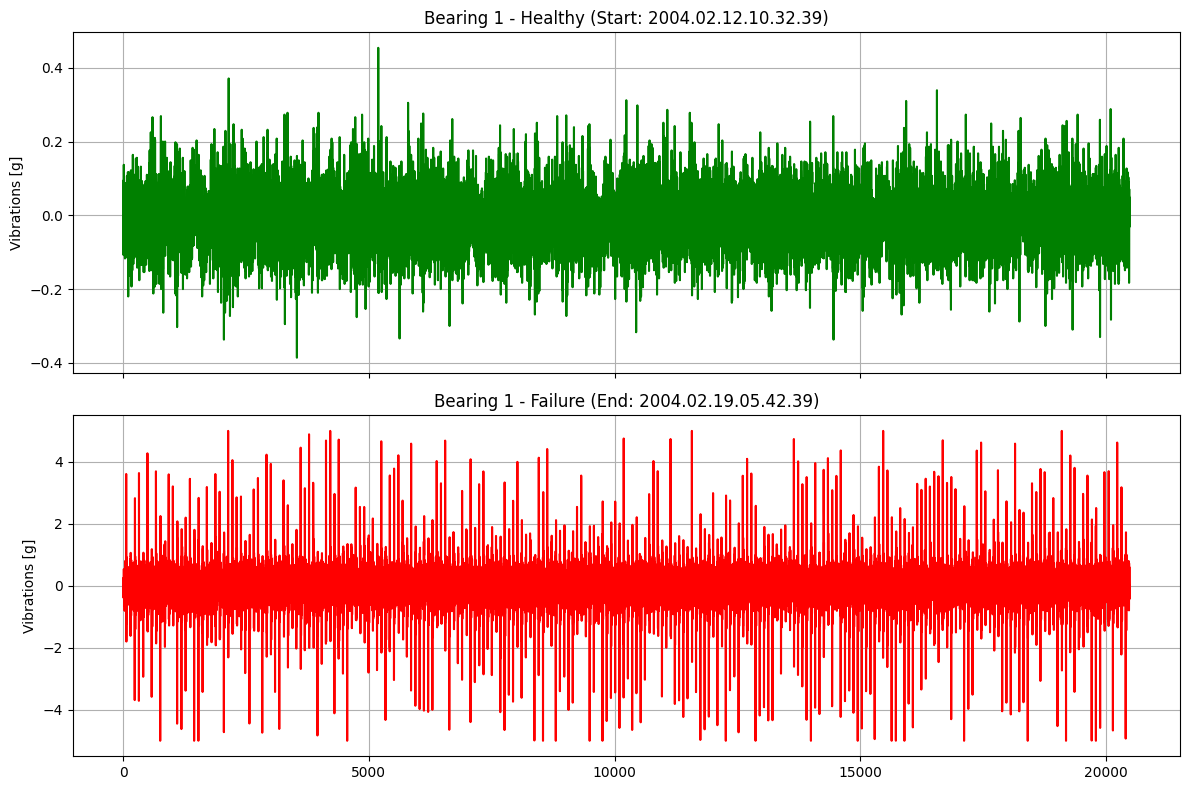

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(df_healthy['Bearing_1'], color='green')
ax[0].set_title(f'Bearing 1 - Healthy (Start: {first_file})')
ax[0].set_ylabel('Vibrations [g]')
ax[0].grid(True)

ax[1].plot(df_failure['Bearing_1'], color='red')
ax[1].set_title(f'Bearing 1 - Failure (End: {fail_file})')
ax[1].set_ylabel('Vibrations [g]')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [29]:
from scipy.fft import fft, fftfreq
import numpy as np

def compute_ff_analysis(df, column_name='Bearing_1', fs=20000):
  """
  Calculates the FFT (Fast Fourier Transform) for a given signal.

  Returns:
  	xf: frequency axis (Hz)
    yf: signal amplitude 
  """

  signal = df[column_name].values
  n = len(signal)

  fft_result = fft(signal)
  xf = fftfreq(n, 1 / fs)

  valid_mask = xf > 0
  xf = xf[valid_mask]
  yf = 2.0 / n * np.abs(fft_result[valid_mask])

  return xf, yf



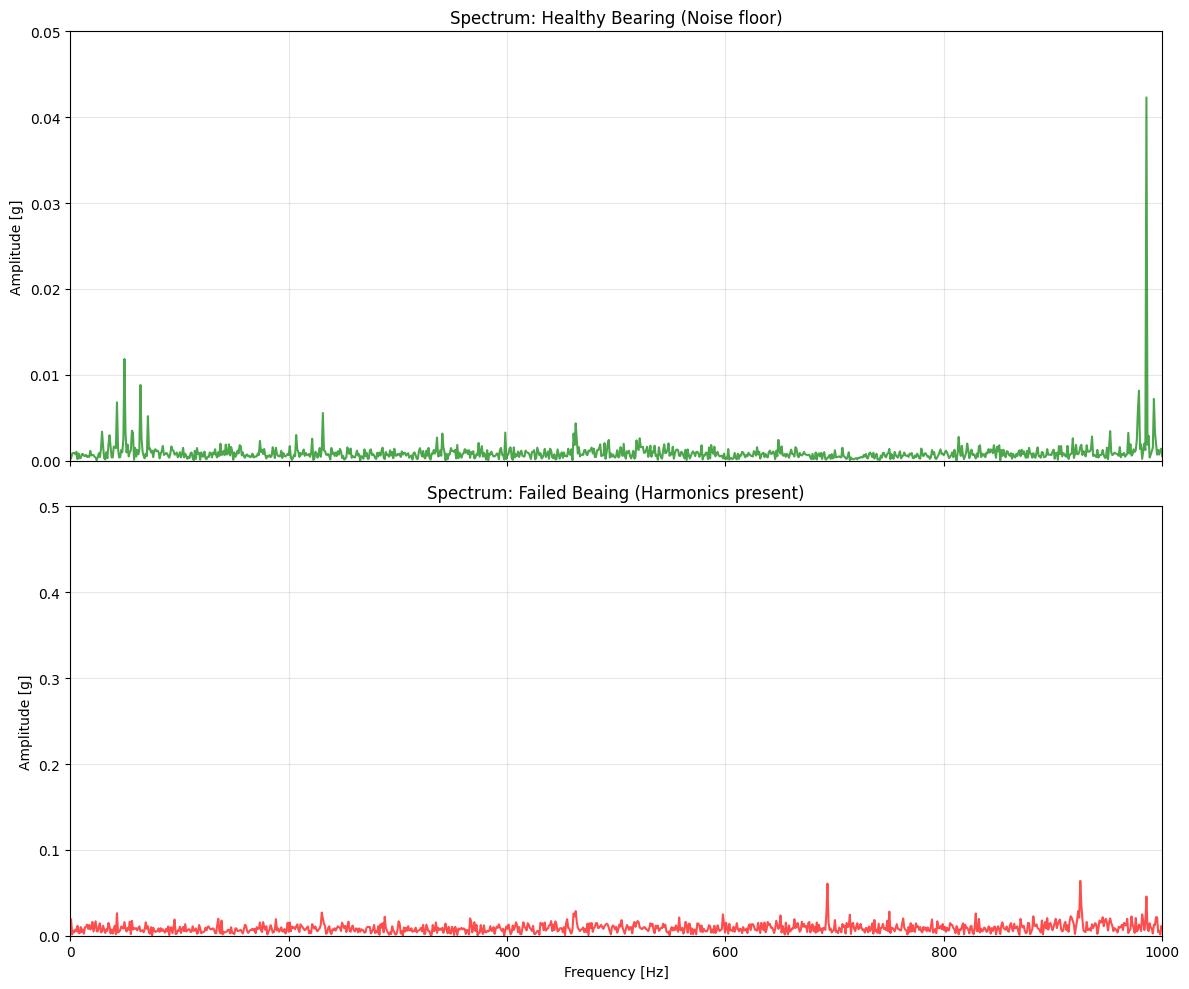

In [30]:
xf_h, yf_h = compute_ff_analysis(df_healthy)
xf_f, yf_f = compute_ff_analysis(df_failure)

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex= True)

ax[0].plot(xf_h, yf_h, color='green', alpha=0.7)
ax[0].set_title('Spectrum: Healthy Bearing (Noise floor)')
ax[0].set_ylabel('Amplitude [g]')
ax[0].grid(True, which='both', alpha=0.3)
ax[0].set_xlim(0, 1000)
ax[0].set_ylim(0, 0.05)

ax[1].plot(xf_f, yf_f, color='red', alpha=0.7)
ax[1].set_title('Spectrum: Failed Beaing (Harmonics present)')
ax[1].set_ylabel('Amplitude [g]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].grid(True, which='Both', alpha=0.3)
ax[1].set_xlim(0, 1000)
ax[1].set_ylim(0, 0.5)

plt.tight_layout()
plt.show()